In [471]:
# importing required libraries

#pandas for data transformation
import pandas as pd
#numpy for numerical operations
import numpy as np
#matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [472]:
#reading the loan csv
loan_data = pd.read_csv("loan.csv")

#Performing Exploratory Data Analysis to understand the structure, attributes and values of the data

In [418]:
#Check no. of rows and columns
loan_data.shape

(39717, 111)

In [419]:
#Find columns where there is no information available and drop them
loan_data.isnull().sum() == loan_data.shape[0]
loan_data.dropna(axis = 1, how = 'all', inplace = True)

#Analyzing the dataset to find columns relevant for Loan prediction
1.Droppping columns with >85% nulls and no business significance
2.Droppping columns with no predictive significance

In [420]:
#Check for columns with >85% null values and drop 
complete_null = []
null_values = loan_data.isna().sum()
c = 0
for index, val in null_values.iteritems():
    c += 1
    print(index, val, (val/39717)*100)
    print(c)
    if (val/39717) >= 0.85:
        complete_null.append(index)
        
      

id 0 0.0
1
member_id 0 0.0
2
loan_amnt 0 0.0
3
funded_amnt 0 0.0
4
funded_amnt_inv 0 0.0
5
term 0 0.0
6
int_rate 0 0.0
7
installment 0 0.0
8
grade 0 0.0
9
sub_grade 0 0.0
10
emp_title 2459 6.191303472064859
11
emp_length 1075 2.7066495455346575
12
home_ownership 0 0.0
13
annual_inc 0 0.0
14
verification_status 0 0.0
15
issue_d 0 0.0
16
loan_status 0 0.0
17
pymnt_plan 0 0.0
18
url 0 0.0
19
desc 12940 32.58050708764509
20
purpose 0 0.0
21
title 11 0.027695948838029054
22
zip_code 0 0.0
23
addr_state 0 0.0
24
dti 0 0.0
25
delinq_2yrs 0 0.0
26
earliest_cr_line 0 0.0
27
inq_last_6mths 0 0.0
28
mths_since_last_delinq 25682 64.66248709620565
29
mths_since_last_record 36931 92.98537150338646
30
open_acc 0 0.0
31
pub_rec 0 0.0
32
revol_bal 0 0.0
33
revol_util 50 0.12589067653649572
34
total_acc 0 0.0
35
initial_list_status 0 0.0
36
out_prncp 0 0.0
37
out_prncp_inv 0 0.0
38
total_pymnt 0 0.0
39
total_pymnt_inv 0 0.0
40
total_rec_prncp 0 0.0
41
total_rec_int 0 0.0
42
total_rec_late_fee 0 0.0
43
r

In [421]:
#Dropping unwanted columns
loan_data.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d","desc","out_prncp_inv","total_pymnt_inv", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_amnt", "next_pymnt_d" ,"last_pymnt_d", "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)

In [422]:
loan_data.shape

(39717, 34)

In [423]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

Possibilty of default is calculated for charged-off(0) or fully paid(1) loans only 

In [424]:
loan_data = loan_data[loan_data.loan_status != "Current"]
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

Check for empty rows and drop 

In [425]:
(loan_data.isna().sum()/len(loan_data.index))*100

loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_length                    2.677761
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
purpose                       0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line              0.000000
inq_last_6mths                0.000000
open_acc                      0.000000
pub_rec                       0.000000
revol_bal                     0.000000
revol_util                    0.129611
total_acc                

In [426]:
#drop all rows with null/empty values
loan_data.dropna(inplace = True)
(loan_data.isna().sum()/len(loan_data.index))*100

loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_length                    0.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
purpose                       0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal                     0.0
revol_util                    0.0
total_acc                     0.0
initial_list_status           0.0
collections_12_mths_ex_med    0.0
policy_code                   0.0
application_ty

In [427]:
#all values are non-null
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36798 entries, 0 to 39623
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   36798 non-null  int64  
 1   funded_amnt                 36798 non-null  int64  
 2   funded_amnt_inv             36798 non-null  float64
 3   term                        36798 non-null  object 
 4   int_rate                    36798 non-null  object 
 5   installment                 36798 non-null  float64
 6   grade                       36798 non-null  object 
 7   sub_grade                   36798 non-null  object 
 8   emp_length                  36798 non-null  object 
 9   home_ownership              36798 non-null  object 
 10  annual_inc                  36798 non-null  float64
 11  verification_status         36798 non-null  object 
 12  issue_d                     36798 non-null  object 
 13  loan_status                 367

In [428]:
print("Mode : " + loan_data.emp_length.mode()[0])
loan_data.emp_length.value_counts()

Mode : 10+ years


10+ years    8368
< 1 year     4329
2 years      4200
3 years      3947
4 years      3290
5 years      3157
1 year       3071
6 years      2133
7 years      1686
8 years      1408
9 years      1209
Name: emp_length, dtype: int64

Standardizing the data 
- "revol_util" column although described as an object column, it has continous values. 
- So we need to standardize the data in this column
- "int_rate" is one such column.
- "emp_length" --> { (< 1 year) is assumed as 0 and 10+ years is assumed as 10 }


In [429]:
loan_data.revol_util = pd.to_numeric(loan_data.revol_util.apply(lambda x : x.split('%')[0]))

In [430]:
loan_data.int_rate = pd.to_numeric(loan_data.int_rate.apply(lambda x : x.split('%')[0]))

In [431]:
loan_data.emp_length = pd.to_numeric(loan_data.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [432]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,...,83.7,9,f,0.0,1,INDIVIDUAL,0,0,0.0,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,...,9.4,4,f,0.0,1,INDIVIDUAL,0,0,0.0,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,...,98.5,10,f,0.0,1,INDIVIDUAL,0,0,0.0,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,...,21.0,37,f,0.0,1,INDIVIDUAL,0,0,0.0,0.0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,...,28.3,12,f,0.0,1,INDIVIDUAL,0,0,0.0,0.0


## Outlier Treatment

<Axes: >

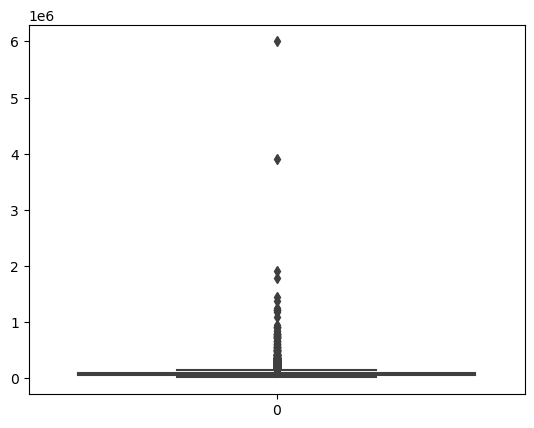

In [433]:
sns.boxplot(loan_data['annual_inc'])

Considering 1.5 IQR as threshold for removing outliers

In [434]:
print('Lower Quartile:', loan_data['annual_inc'].quantile(0.25))
print('Upper Quartile:', loan_data['annual_inc'].quantile(0.75))
IQR = loan_data['annual_inc'].quantile(0.75) - loan_data['annual_inc'].quantile(0.25)
print('IQR:', IQR)
print('Median:', loan_data['annual_inc'].quantile(0.5))
print(loan_data['annual_inc'].quantile(0.5)-(1.5*IQR), loan_data['annual_inc'].quantile(0.5)+(1.5*IQR))

Lower Quartile: 41159.25
Upper Quartile: 83000.0
IQR: 41840.75
Median: 60000.0
-2761.125 122761.125


In [435]:
#Remove the records outside the Median-1.5IQR and Median+1.5IQR
loan_data = loan_data[(loan_data['annual_inc']< loan_data['annual_inc'].quantile(0.5)+(1.5*IQR)) & (loan_data['annual_inc']>loan_data['annual_inc'].quantile(0.5)-(1.5*IQR))]


<Axes: >

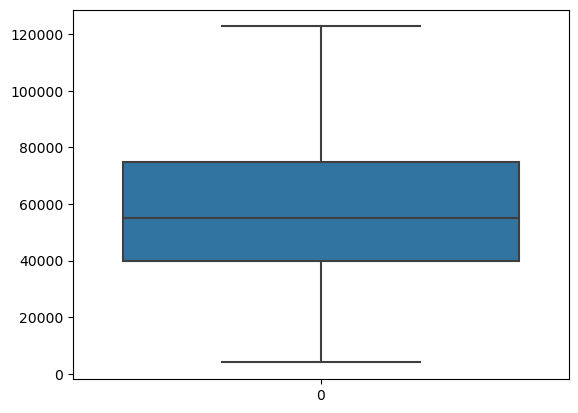

In [436]:
sns.boxplot(loan_data.annual_inc)

Now the "annual_inc" data looks good and proceeding next.
Check delinq

<Axes: >

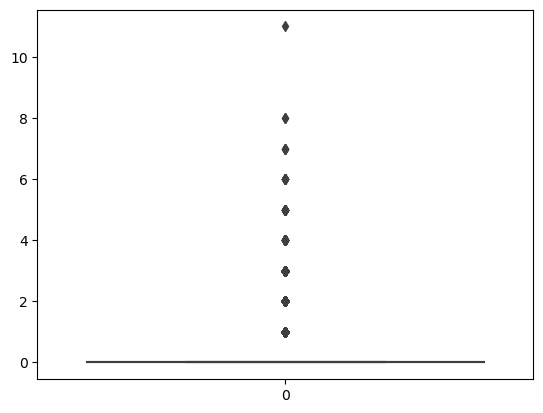

In [437]:
sns.boxplot(loan_data.delinq_2yrs)

In [438]:
#Remove the records outside the Median-1.5IQR and Median+1.5IQR
print('Lower Quartile:', loan_data['delinq_2yrs'].quantile(0.25))
print('Upper Quartile:', loan_data['delinq_2yrs'].quantile(0.75))
IQR = loan_data['delinq_2yrs'].quantile(0.75) - loan_data['delinq_2yrs'].quantile(0.25)
print('IQR:', IQR)
print('Median:', loan_data['delinq_2yrs'].quantile(0.5))
print(loan_data['delinq_2yrs'].quantile(0.5)-(1.5*IQR), loan_data['delinq_2yrs'].quantile(0.5)+(1.5*IQR))




Lower Quartile: 0.0
Upper Quartile: 0.0
IQR: 0.0
Median: 0.0
0.0 0.0


In [439]:
print(loan_data['delinq_2yrs'])

0        0
1        0
2        0
3        0
5        0
        ..
39475    0
39551    0
39562    0
39573    0
39623    0
Name: delinq_2yrs, Length: 33808, dtype: int64


In [440]:

loan_data.delinq_2yrs.value_counts()

0     30209
1      2778
2       557
3       182
4        48
5        17
6        10
7         4
8         2
11        1
Name: delinq_2yrs, dtype: int64

0    16488
1     9364
2     4933
3     2562
4      254
5      122
6       46
7       30
8        9
Name: inq_last_6mths, dtype: int64

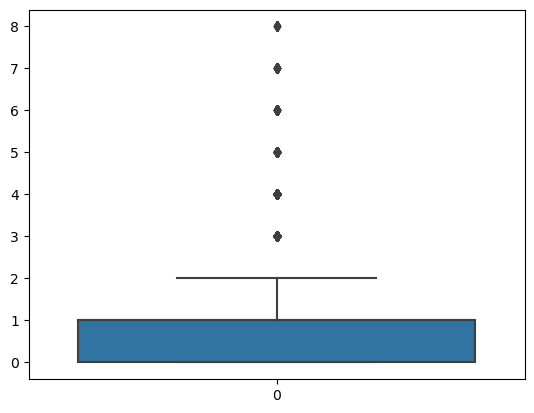

In [441]:
sns.boxplot(loan_data.inq_last_6mths)
loan_data.inq_last_6mths.value_counts()

<Axes: >

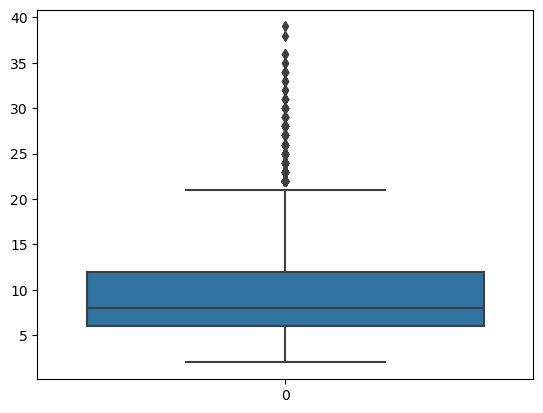

In [442]:
sns.boxplot(loan_data.open_acc)

Lower Quartile: 6.0
Upper Quartile: 12.0
IQR: 6.0
Median: 8.0
-1.0 17.0


<Axes: >

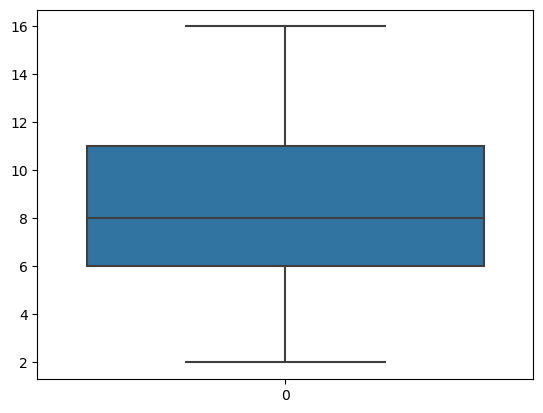

In [443]:
#Remove the records outside the Median-1.5IQR and Median+1.5IQR
print('Lower Quartile:', loan_data['open_acc'].quantile(0.25))
print('Upper Quartile:', loan_data['open_acc'].quantile(0.75))
IQR = loan_data['open_acc'].quantile(0.75) - loan_data['open_acc'].quantile(0.25)
print('IQR:', IQR)
print('Median:', loan_data['open_acc'].quantile(0.5))
print(loan_data['open_acc'].quantile(0.5)-(1.5*IQR), loan_data['open_acc'].quantile(0.5)+(1.5*IQR))
#Remove the records outside the Median-1.5IQR and Median+1.5IQR
loan_data = loan_data[(loan_data['open_acc']< loan_data['open_acc'].quantile(0.5)+(1.5*IQR)) & (loan_data['open_acc']>loan_data['open_acc'].quantile(0.5)-(1.5*IQR))]
sns.boxplot(loan_data.open_acc)

<Axes: >

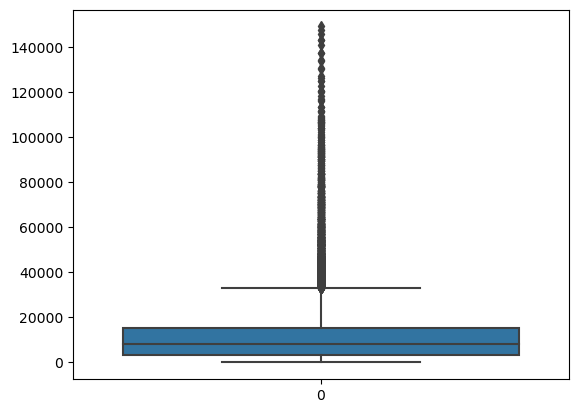

In [444]:
sns.boxplot(loan_data.revol_bal)


In [445]:
#Remove the records outside the Median-1.5IQR and Median+1.5IQR
print('Lower Quartile:', loan_data['revol_bal'].quantile(0.25))
print('Upper Quartile:', loan_data['revol_bal'].quantile(0.75))
IQR = loan_data['revol_bal'].quantile(0.75) - loan_data['revol_bal'].quantile(0.25)
print('IQR:', IQR)
print('Median:', loan_data['revol_bal'].quantile(0.5))
print(loan_data['revol_bal'].quantile(0.5)-(1.5*IQR), loan_data['revol_bal'].quantile(0.5)+(1.5*IQR))



Lower Quartile: 3391.0
Upper Quartile: 15228.5
IQR: 11837.5
Median: 8095.0
-9661.25 25851.25


<Axes: >

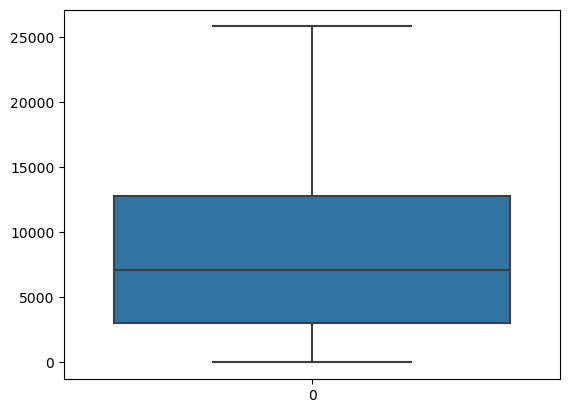

In [446]:
#Remove the records outside the Median-1.5IQR and Median+1.5IQR
loan_data = loan_data[(loan_data['revol_bal']< loan_data['revol_bal'].quantile(0.5)+(1.5*IQR)) & (loan_data['revol_bal']>loan_data['revol_bal'].quantile(0.5)-(1.5*IQR))]
sns.boxplot(loan_data.revol_bal)

In [447]:
loan_data[loan_data['revol_bal'] > loan_data['revol_bal'].quantile(0.5)+(1.5*IQR)]['loan_status'].value_counts()

Fully Paid     225
Charged Off     31
Name: loan_status, dtype: int64

## Univariate Analysis



<Axes: xlabel='loan_amnt', ylabel='Density'>

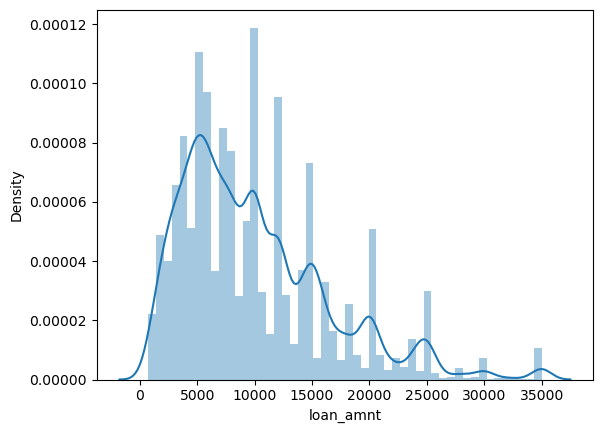

In [448]:
#Loan Amount
sns.distplot(loan_data['loan_amnt'])

<Axes: xlabel='funded_amnt', ylabel='Density'>

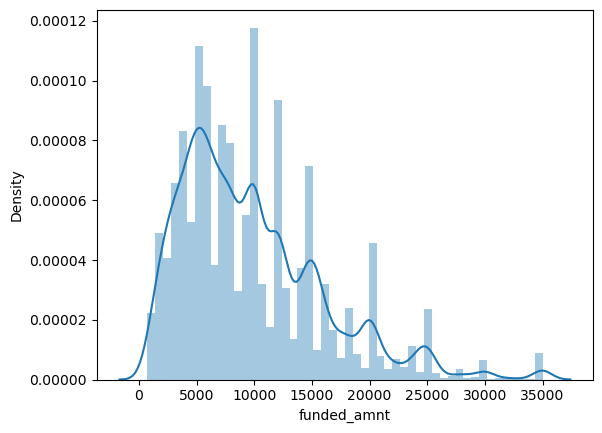

In [449]:
#Funded Amount
sns.distplot(loan_data['funded_amnt'])

<Axes: xlabel='funded_amnt_inv', ylabel='Density'>

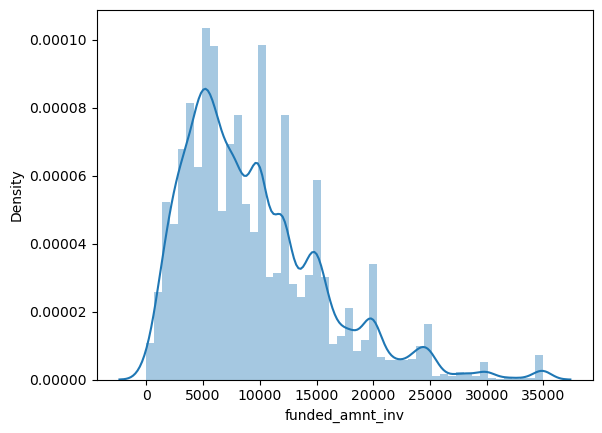

In [450]:
#Funded Amount inv
sns.distplot(loan_data['funded_amnt_inv'])

Mostly people apply for loan for 4000 to 7000 and we can see spikes at 5000, 10000, 15000, 20000 and so on. So mostly people prefer to go for such kind of amounts.

<Axes: xlabel='term', ylabel='count'>

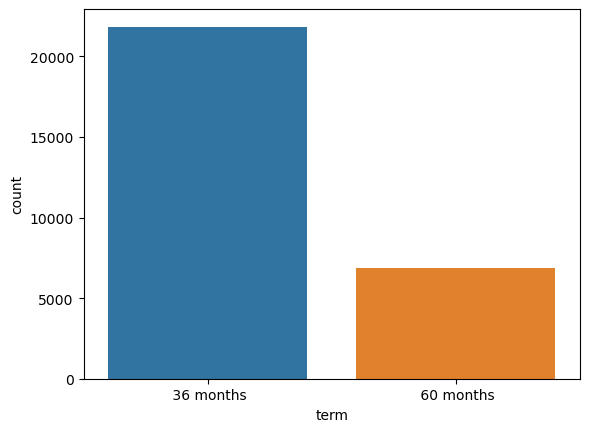

In [451]:
sns.countplot(data=loan_data, x='term')

Mostly people go for 36 months plan than 60 months plan. People are interested in short term loan than long term loan

<Axes: xlabel='int_rate', ylabel='Density'>

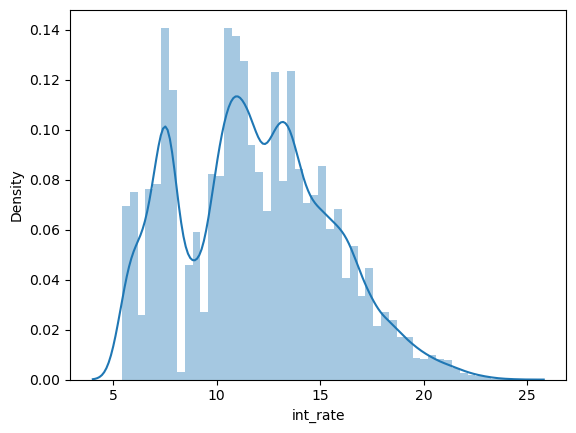

In [452]:
#Interest rate
sns.distplot(loan_data['int_rate'])


<Axes: xlabel='installment', ylabel='Density'>

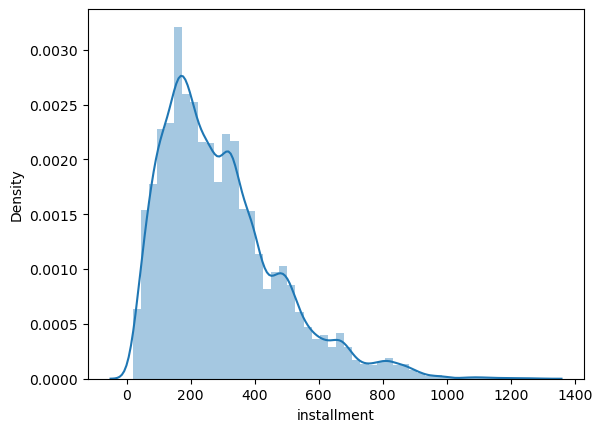

In [453]:
sns.distplot(loan_data['installment'])

Most installments are between 100-300

<Axes: xlabel='grade', ylabel='count'>

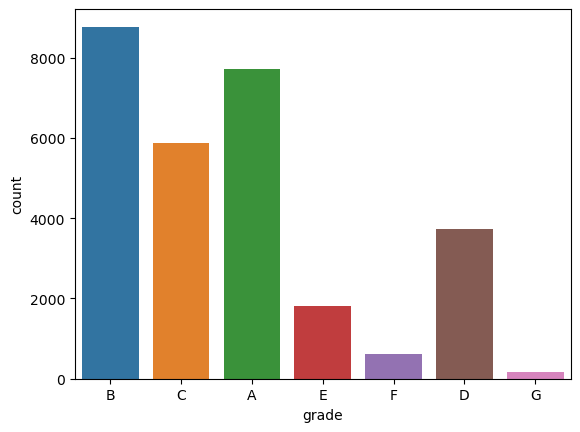

In [454]:
sns.countplot(data=loan_data, x='grade')

Most of the borrowers are of good credit quality - B FOLLOWED BY A

<Axes: xlabel='emp_length', ylabel='count'>

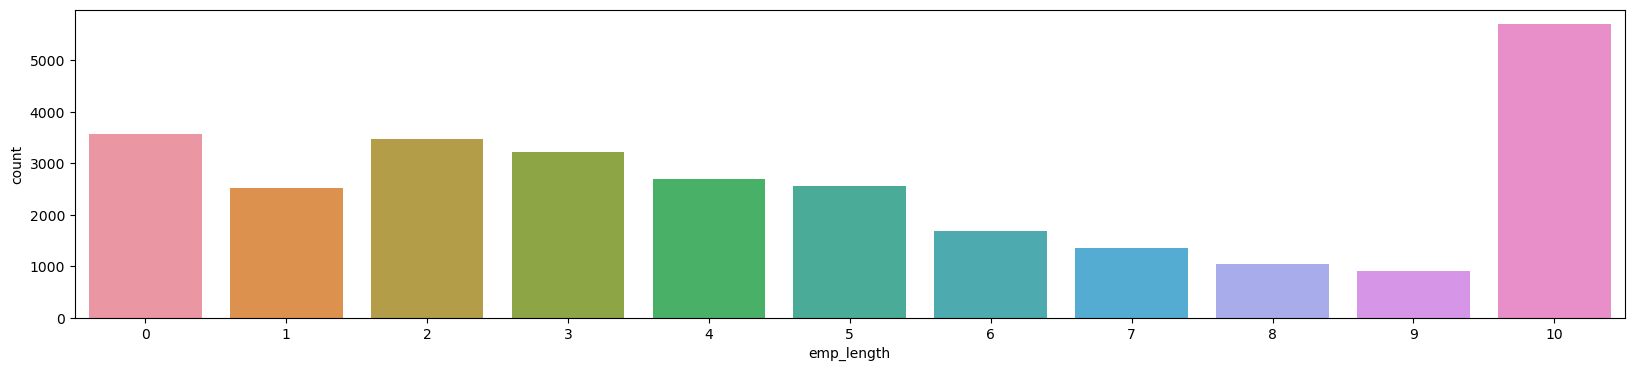

In [455]:
plt.figure(figsize=(20,4))
sns.countplot(x = 'emp_length', data = loan_data)

Most of the borrowers have >10yrs exp

<Axes: xlabel='grade', ylabel='count'>

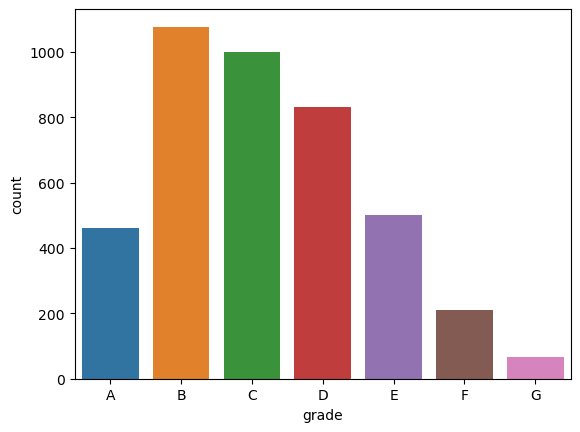

In [456]:
sns.countplot(x = 'grade', data = loan_data[loan_data.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

As credit quality detiriorates, likelihood of default increases

####  Analyzing home_ownership

In [457]:
#checking unique values for home_ownership
loan_data['home_ownership'].unique()


array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

#### There are only 3 records with 'NONE' value in the data. So replacing the value with 'OTHER'

In [458]:
#replacing 'NONE' with 'OTHERS'
loan_data['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [459]:
#checking unique values for home_ownership again
loan_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<Axes: xlabel='home_ownership', ylabel='count'>

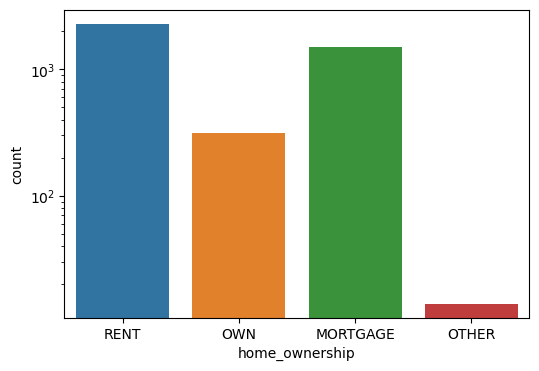

In [460]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan_data[loan_data['loan_status']=='Charged Off'])

Majority of borrowers stay in rented accomodations, followed by those who stay in mortgaged accomodations

<Axes: xlabel='annual_inc', ylabel='Density'>

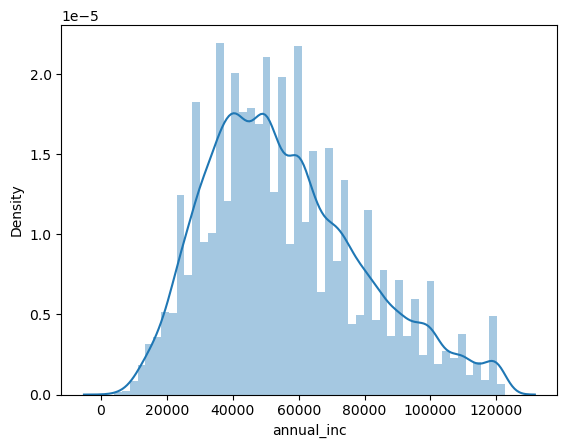

In [461]:
sns.distplot(loan_data['annual_inc'])

Borrowers with pay of 30000-60000 are the ones who take the majority of loans

<Axes: xlabel='verification_status', ylabel='count'>

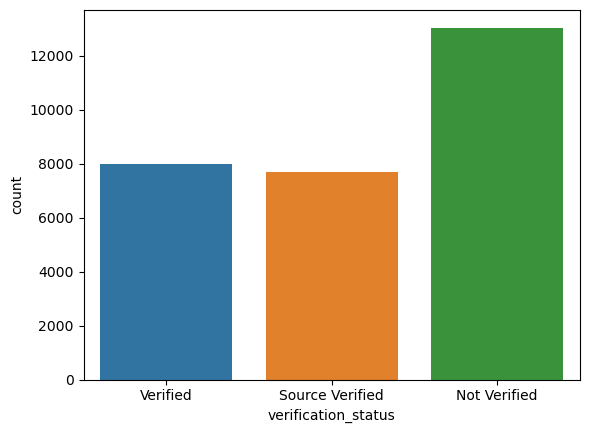

In [462]:
sns.countplot(data=loan_data, x='verification_status')

Most borrowers' income is Not Verified

<Axes: xlabel='verification_status', ylabel='count'>

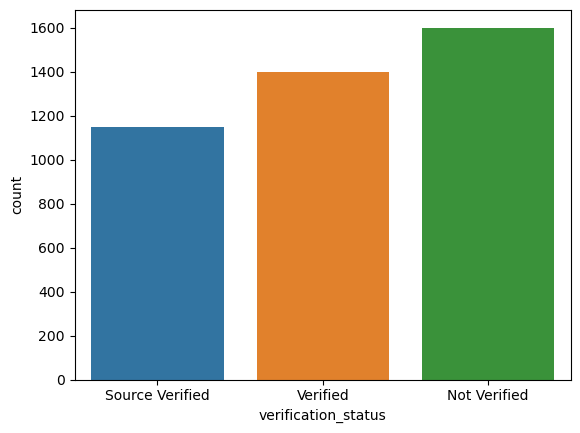

In [463]:
sns.countplot(data=loan_data[loan_data.loan_status == 'Charged Off'], x='verification_status')

Majority of loans that failed were mthose where Income was Not Verifed

<Axes: xlabel='count', ylabel='purpose'>

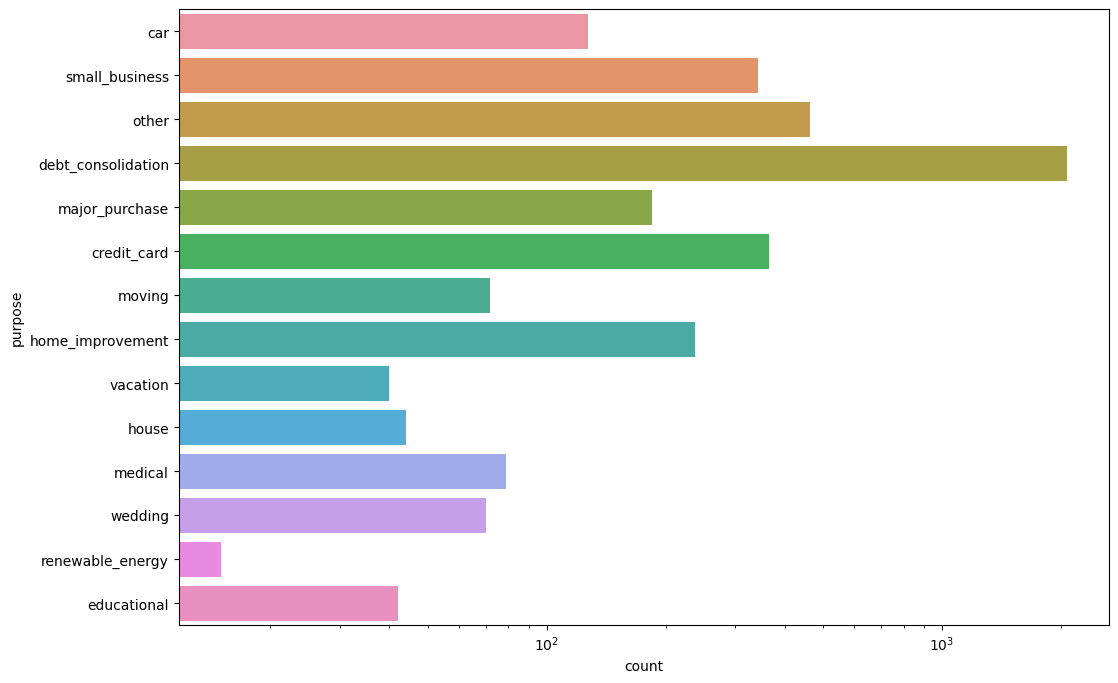

In [467]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan_data[loan_data.loan_status == 'Charged Off'])


Maximum charged off loans were taken for debt consolidation, credit cards and for small businesses

#### Creating bins for some numerical variable to make them categorical

<Axes: xlabel='count', ylabel='addr_state'>

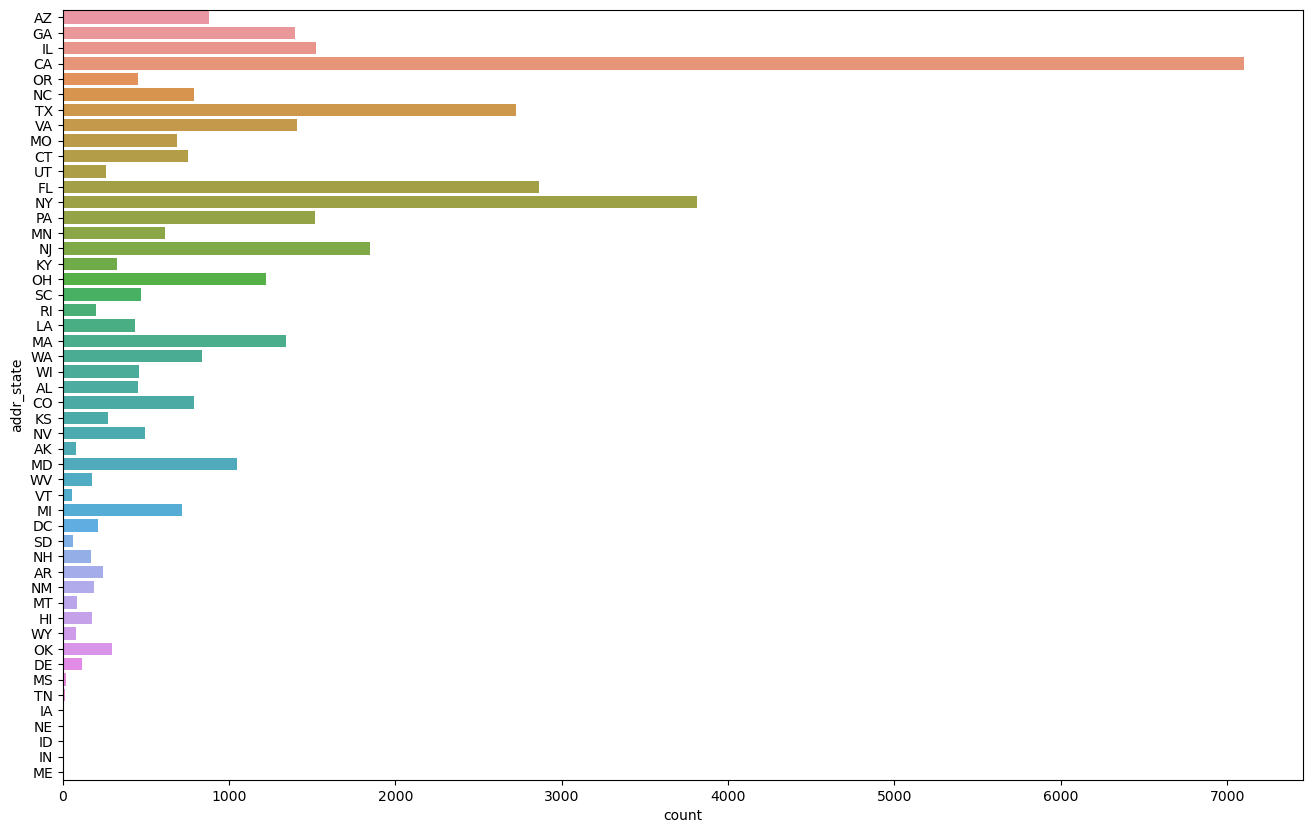

In [473]:
fig, ax = plt.subplots(figsize = (16,10))
sns.countplot(data=loan_data, y='addr_state')

Highest #of loans are taken from states of CA, NY, FL

In [ ]:

sns.distplot(loan_data['dti'])

dti of most borrowers is 7-20

<Axes: xlabel='dti', ylabel='Density'>

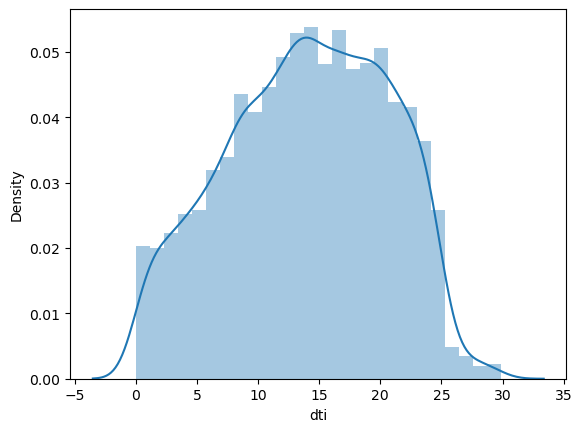

In [486]:
ld1 = loan_data[loan_data.loan_status == 'Charged Off']
sns.distplot(ld1['dti'])

<Axes: xlabel='total_acc', ylabel='Density'>

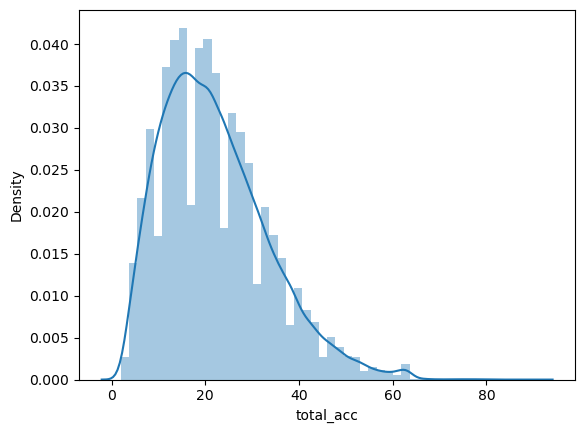

In [489]:
sns.distplot(loan_data['total_acc'])

Mostly number of credit lines are between 10-25

<Axes: xlabel='revol_bal', ylabel='Density'>

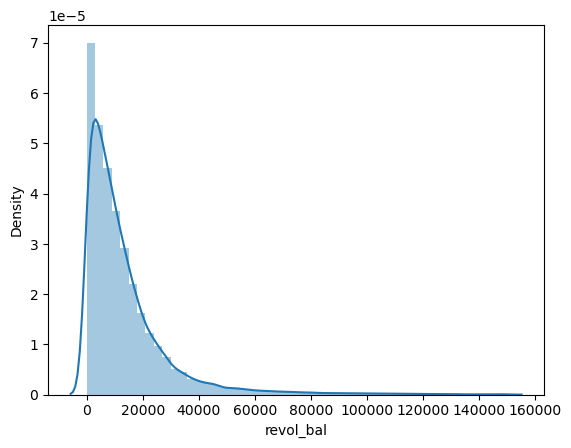

In [491]:
sns.distplot(loan_data['revol_bal'])

Mostly revolving balance is below 20000

Majority of the borrowers that were charged off had a dti of 15-20

#### Similarly analyzing open_acc,revol_util,total_acc,annual_inc

### Bivariate Analysis

## Analysing annual income with other columns for more insights 

#### 1.Annual income vs loan purpose

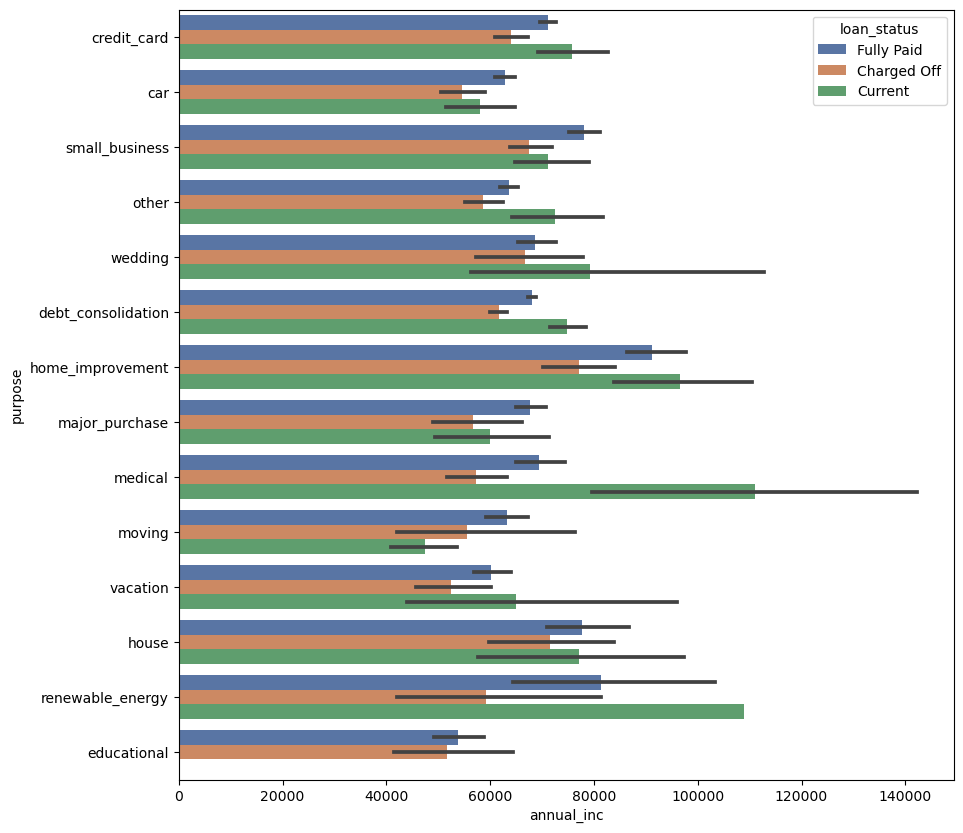

In [492]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

### Though the number of loans applied and defaulted are the highest in number for "debt_consolation", the annual income of those who applied isn't the highest. 
- Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses"

#### 2.Annual income vs home ownership

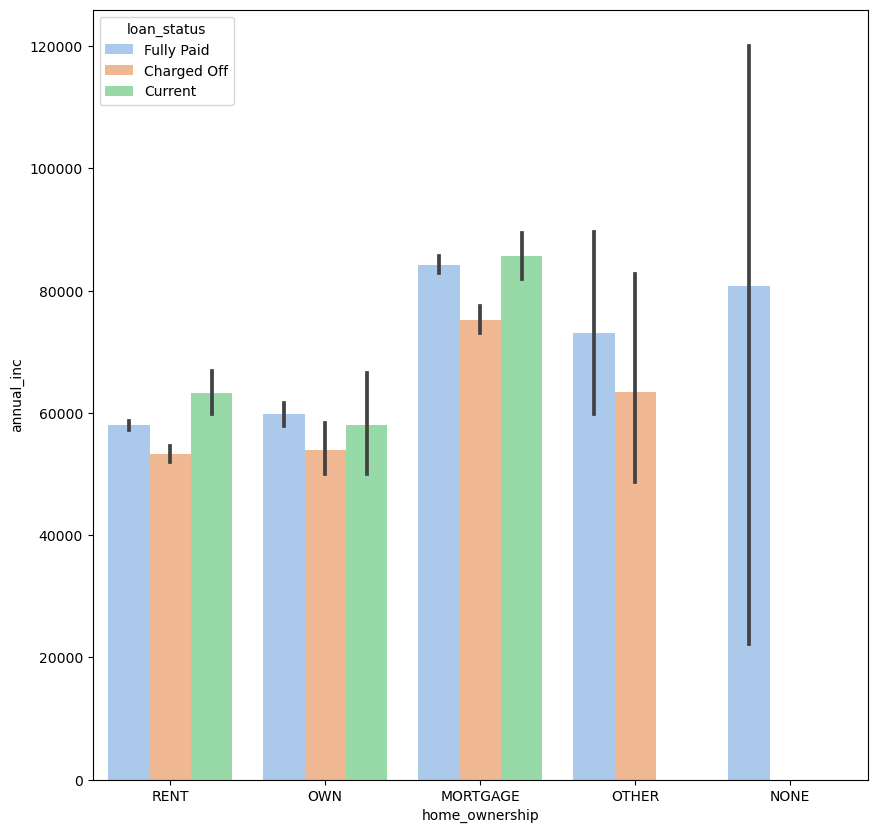

In [493]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

### Annual Income vs Loan amount

<Axes: >

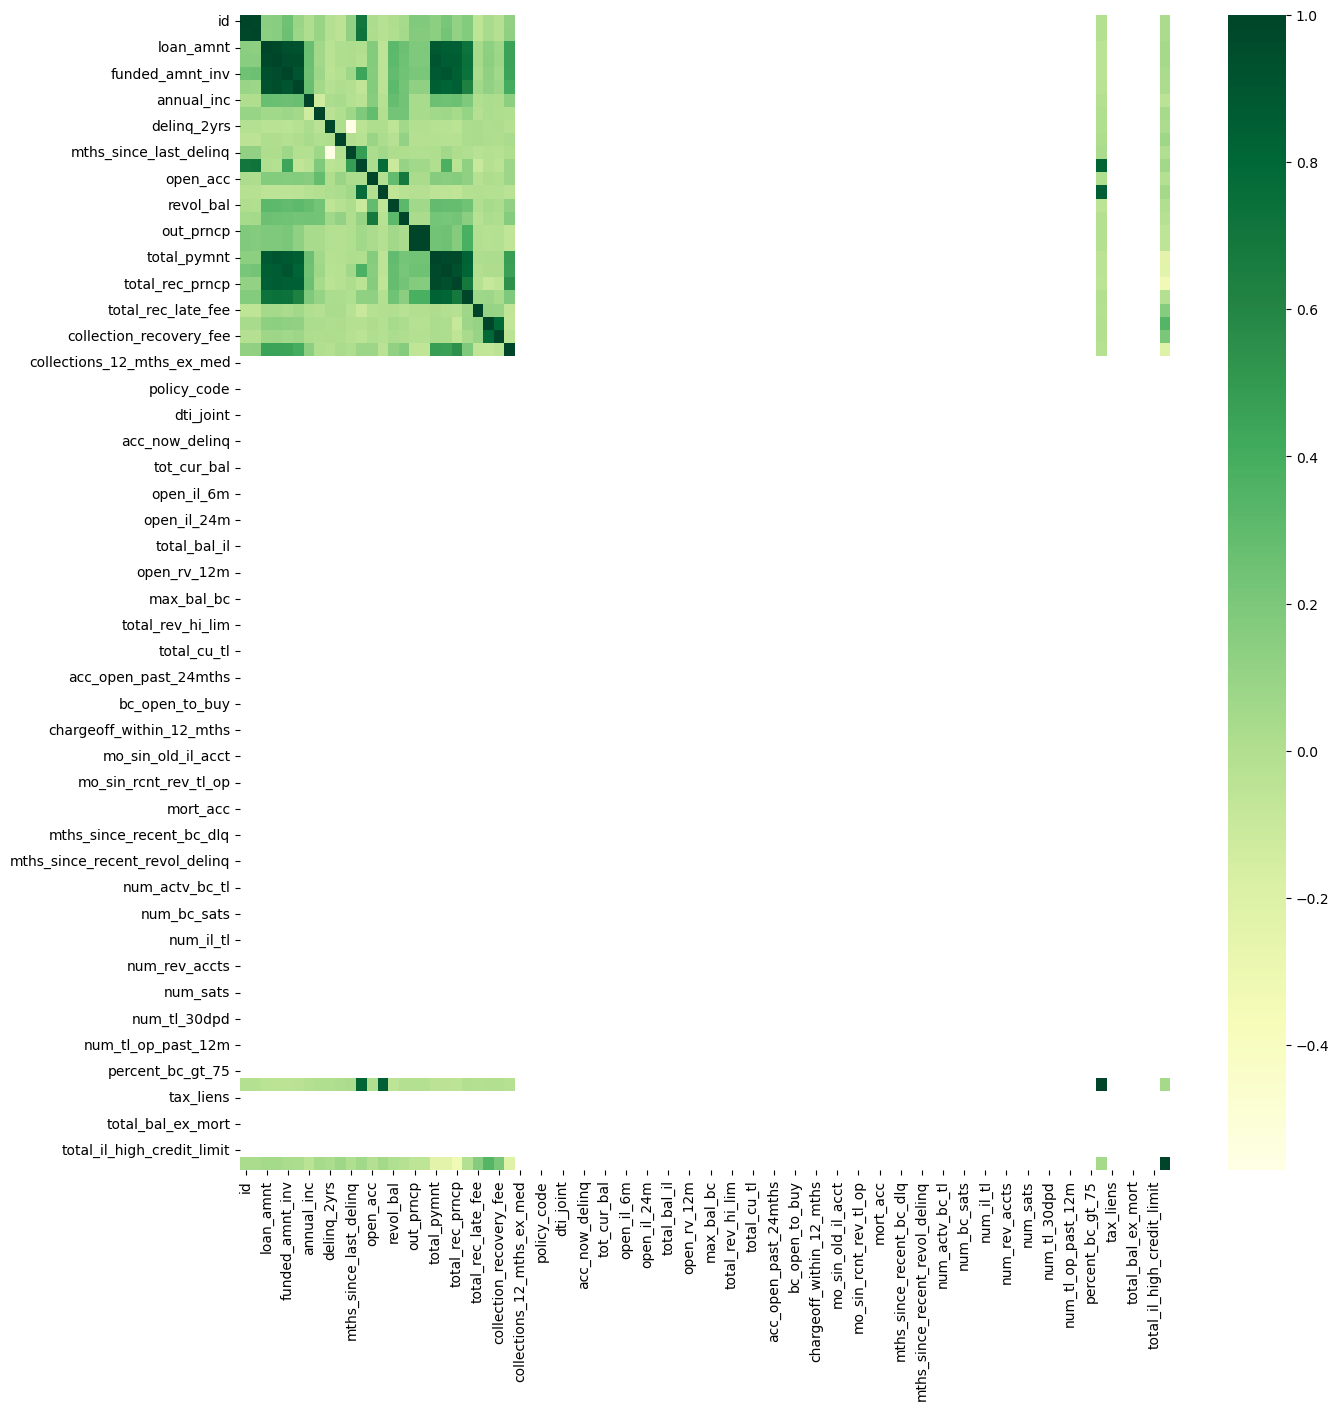

In [518]:
loan_data['loan_status_derived'] = loan_data['loan_status'].apply(lambda x:1 if x == 'Charged Off' else 0)
plt.figure(figsize=(15,15))
sns.heatmap(loan_data.corr(), cmap='YlGn')

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

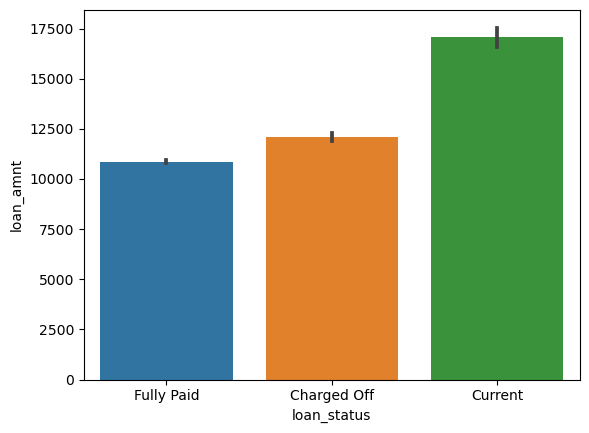

In [519]:
sns.barplot(data=loan_data, x='loan_status', y='loan_amnt')

Non Default customers have lower loan amounts than the Defaulters

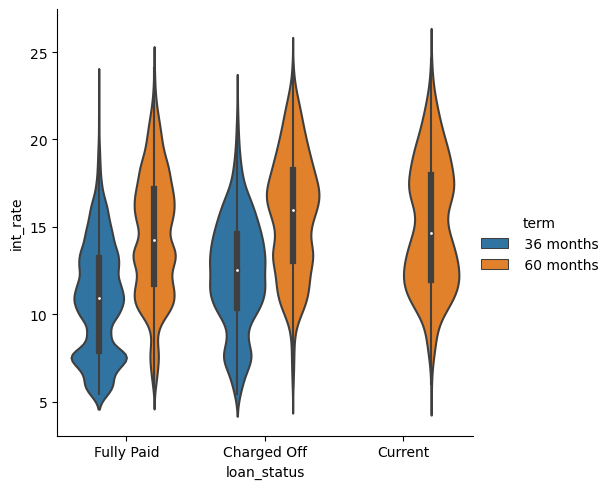

In [525]:
#print(loan_data['int_rate'])
sns.catplot(data=loan_data, x='loan_status', y='int_rate', hue='term', kind='violin')

It seems who have taken loan for 36 months with 13% interest (apprx.) and 60 months above 15% interest have higher chance of being default

<Axes: xlabel='loan_status', ylabel='installment'>

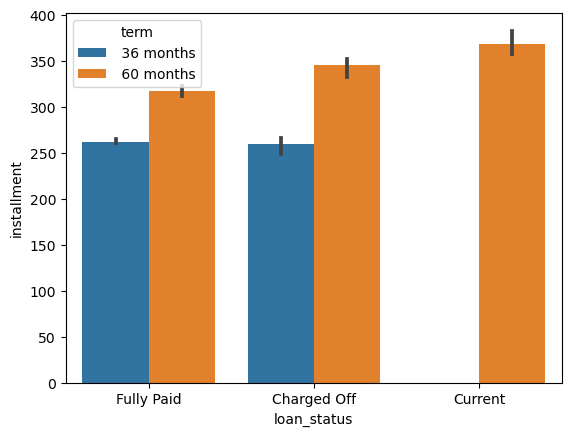

In [527]:
sns.barplot(data=loan_data, x='loan_status', y='installment', hue='term', estimator=np.median)

Defaulters have more than avg 250 dollar monthly installments for 36 months, 320 dollar for 60 months

In [529]:
loan_data[loan_data['loan_status'] == 'Charged Off']['grade'].value_counts()

B    1425
C    1347
D    1118
E     715
A     602
F     319
G     101
Name: grade, dtype: int64

In [530]:
loan_data[loan_data['loan_status'] == 'Fully Paid']['grade'].value_counts()

B    10250
A     9443
C     6487
D     3967
E     1948
F      657
G      198
Name: grade, dtype: int64

<Axes: xlabel='loan_status', ylabel='count'>

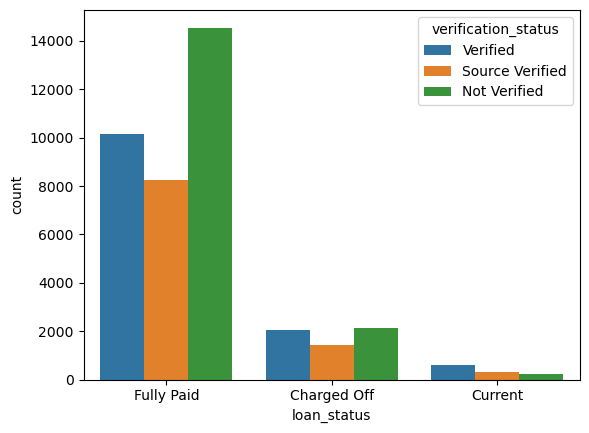

In [532]:
sns.countplot(data=loan_data, x='loan_status', hue='verification_status')

Majority of the Charged odd loans are Not verified

<Axes: xlabel='loan_status', ylabel='inq_last_6mths'>

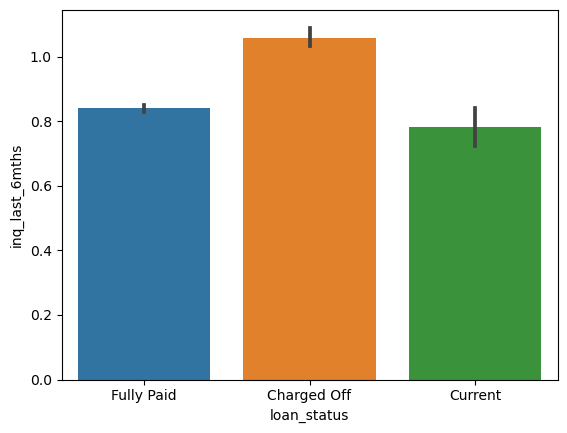

In [534]:
sns.barplot(data=loan_data, x='loan_status', y='inq_last_6mths', estimator=np.mean)

More enquiries in last 6months increases likelihood of default

<Axes: xlabel='loan_status', ylabel='pub_rec'>

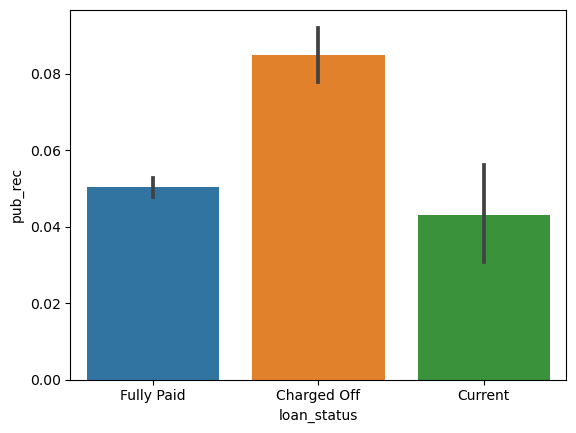

In [535]:
sns.barplot(data=loan_data, x='loan_status', y='pub_rec', estimator=np.mean)

Defaulters have higher number of derogatory public records

<Axes: xlabel='loan_status', ylabel='pub_rec_bankruptcies'>

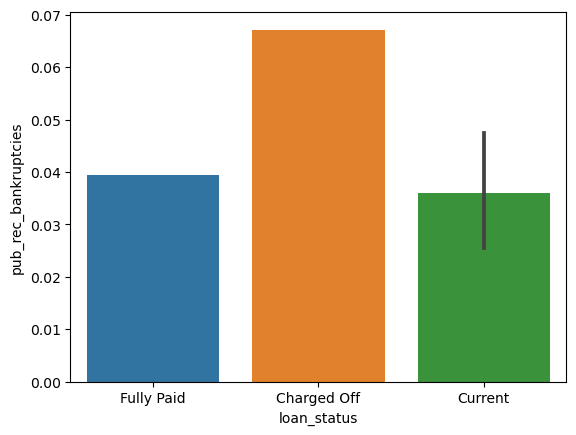

In [537]:
sns.barplot(data=loan_data, x='loan_status', y='pub_rec_bankruptcies', estimator=np.mean)

Defaulters have more bankruptices in publicly available records